# Extract weights or bias from .npy file

In [19]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load("/Users/hongbing/Projects/bst-study/workspace/adas_bst_v8_3_1120/IR.npy")
for layer_name in data[()]:
     print(layer_name)

FeatureExtractor/resnet_v1_50/conv1-1/Conv2D
FeatureExtractor/resnet_v1_50/conv1-2/Conv2D
FeatureExtractor/resnet_v1_50/block1/unit_1/bottleneck_v1/shortcut/Conv2D
FeatureExtractor/resnet_v1_50/block1/unit_1/bottleneck_v1/conv1/Conv2D
FeatureExtractor/resnet_v1_50/block1/unit_1/bottleneck_v1/lookup/shortcut/Conv2D
FeatureExtractor/resnet_v1_50/block1/unit_1/bottleneck_v1/conv2_grouped/Conv2D
FeatureExtractor/resnet_v1_50/block1/unit_1/bottleneck_v1/conv3/Conv2D
FeatureExtractor/resnet_v1_50/block1/unit_1/bottleneck_v1/lookup/residual/Conv2D
FeatureExtractor/resnet_v1_50/block1/unit_2/bottleneck_v1/conv1/Conv2D
FeatureExtractor/resnet_v1_50/block1/unit_2/bottleneck_v1/lookup/shortcut/Conv2D
FeatureExtractor/resnet_v1_50/block1/unit_2/bottleneck_v1/conv2_grouped/Conv2D
FeatureExtractor/resnet_v1_50/block1/unit_2/bottleneck_v1/conv3/Conv2D
FeatureExtractor/resnet_v1_50/block1/unit_2/bottleneck_v1/lookup/residual/Conv2D
FeatureExtractor/resnet_v1_50/block1/unit_3/bottleneck_v1/conv1/Conv2D

## Get one specific bias and print out values

In [5]:
bias = data[()]["FeatureExtractor/resnet_v1_50/block3/unit_2/bottleneck_v1/conv2_grouped/Conv2D"]["bias"]
print(bias)

[ 1.63182056e+00  4.67655689e-01  4.27826196e-02 -1.19230831e+00
  1.54633284e+00 -1.80453807e-01 -2.98469007e-01  2.03489661e+00
  5.60443282e-01  1.16070485e+00  7.52838433e-01  9.11017179e-01
  5.18916667e-01  2.80912519e-02  4.78674650e-01  5.92124641e-01
  1.41390300e+00  6.89607322e-01  8.71747196e-01  1.15178072e+00
  1.84844956e-01  1.30237186e+00 -3.75495577e+00  5.17832160e-01
  8.81634176e-01 -5.51462710e-01  1.66629195e+00  7.27100968e-01
  2.18202233e+00 -1.24980927e-01  2.18565822e-01 -2.57523608e+00
 -1.70658445e+00  1.45925176e+00  1.65164852e+00  1.02968085e+00
 -5.08497834e-01  3.98598522e-01  8.44927967e-01  6.16228223e-01
  6.94396973e-01  1.63329691e-02  1.20352793e+00  6.98089600e-01
  2.21102059e-01  8.31726789e-01  7.99597979e-01  3.07601452e-01
  8.81662786e-01 -4.13944662e-01 -1.61054805e-02 -1.33389425e+00
  2.24795848e-01 -9.56453264e-01  2.59494066e-01  7.23632336e-01
 -4.11840618e-01 -8.89392018e-01  1.31019402e+00  2.89855510e-01
  1.24768341e+00  1.13623

## Get one specific weights and print out values

In [7]:
weights = data[()]["FeatureExtractor/resnet_v1_50/block3/unit_2/bottleneck_v1/conv2_grouped/Conv2D"]["weights"]
print(weights)

[[[[ 5.30726351e-02 -1.61327600e-01 -1.41489789e-01 ... -6.19245088e-03
    -1.49433091e-01  2.87862774e-02]
   [-6.50919508e-04  1.91793889e-01  1.15876928e-01 ... -8.58983099e-02
     1.33151738e-02  7.30101243e-02]
   [-8.86204988e-02 -4.32518199e-02  1.29752373e-02 ...  9.79402736e-02
    -1.24570122e-03  1.44822765e-02]
   ...
   [ 1.19444085e-02 -6.56110346e-02 -3.33836838e-03 ... -1.18667614e-02
    -4.92054485e-02  7.40770921e-02]
   [-6.17195331e-02  6.26601353e-02  4.35816459e-02 ...  1.42336130e-01
     1.18361590e-02 -5.14616929e-02]
   [ 4.82459515e-02  2.83540832e-03 -1.05658509e-01 ...  3.58631574e-02
     2.92387418e-02 -9.18434560e-03]]

  [[ 1.87736861e-02 -5.79359494e-02 -8.54551271e-02 ...  1.02023430e-01
     1.17297042e-02 -1.35788932e-01]
   [-7.53307045e-02  3.09061036e-02  2.69754320e-01 ... -7.37584531e-02
    -3.89701512e-04 -6.50662463e-03]
   [ 1.29318992e-02  5.70275448e-02  1.66031972e-01 ...  2.76612435e-02
    -2.69291401e-02 -9.16225091e-03]
   ...
   

In [8]:
weight = data[()]["FeatureExtractor/resnet_v1_50/block3/unit_2/bottleneck_v1/conv2_grouped/Conv2D"]['weights']
weight_1D = weight.flatten()
rmin = np.percentile(weight, 0, None)
print(rmin)
rmax = np.percentile(weight, 100, None)
print(rmax)

-0.9902240633964539
1.2193387746810913


In [9]:
rmax = weight.max()
print(rmax)
rmin = weight.min()
print(rmin)

1.2193388
-0.99022406


In [11]:
scale = np.power(2, np.ceil(np.log2(max(abs(rmax), abs(rmin)))))
print(scale)
shift = 1 / scale
print(shift)

2.0
0.5


In [20]:
weight = data[()]["FeatureExtractor/resnet_v1_50/block1/unit_1/bottleneck_v1/conv1/Conv2D"]['weights']
rmax = weight.max()
print(rmax)
rmin = weight.min()
print(rmin)

2.3908744
-2.6800237


In [21]:
scale = np.power(2, np.ceil(np.log2(max(abs(rmax), abs(rmin)))))
print(scale)
shift = 1 / scale
print(shift)

4.0
0.25


In [10]:
weight = data[()]['hm/conv2d_1/Conv2D']['weights']
weight_1d = weight.flatten().tobytes()

output_bin_filename = "bins_weight/hm_conv2d_1_Conv2D.bin"
        
with open(output_bin_filename, 'wb') as output:
    output.write(weight_1d)

-5.180027484893799
1.0861045122146606


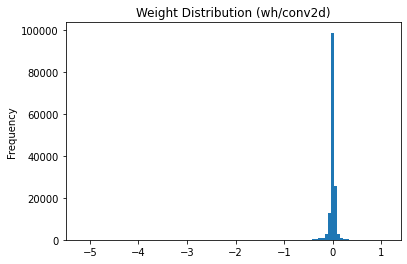

In [8]:
weight = data[()]['wh/conv2d/Conv2D']['weights']
weight_1D = weight.flatten()
rmin = np.percentile(weight, 0, None)
print(rmin)
rmax = np.percentile(weight, 100, None)
print(rmax)

plt.clf()
plt.hist(weight_1D, bins=100)
plt.gca().set(title='Weight Distribution (wh/conv2d)', ylabel='Frequency')
plt.savefig('wh_conv2d.jpg')

In [3]:
rmin = np.percentile(weight, 1, None)
print(rmin)
rmax = np.percentile(weight, 99, None)
print(rmax)

-0.24444247037172318
0.1751694850623624


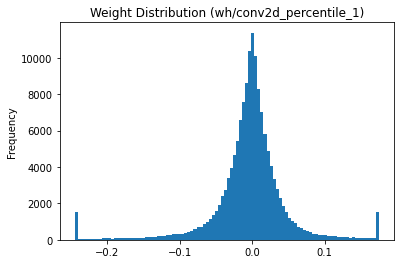

In [4]:
weight_1D[weight_1D > rmax] = rmax
weight_1D[weight_1D < rmin] = rmin

plt.clf()
plt.hist(weight_1D, bins=100)
plt.gca().set(title='Weight Distribution (wh/conv2d_percentile_1)', ylabel='Frequency')
plt.savefig('wh_conv2d_percentile_1.jpg')

-0.3487598061561585
0.2420957770198594


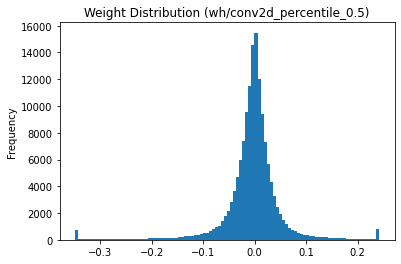

In [5]:
rmin = np.percentile(weight, 0.5, None)
print(rmin)
rmax = np.percentile(weight, 99.5, None)
print(rmax)

weight_1D = weight.flatten()
weight_1D[weight_1D > rmax] = rmax
weight_1D[weight_1D < rmin] = rmin

plt.clf()
plt.hist(weight_1D, bins=100)
plt.gca().set(title='Weight Distribution (wh/conv2d_percentile_0.5)', ylabel='Frequency')
plt.savefig('wh_conv2d_percentile_0.5.jpg')

-0.6482174941897392
0.4111506165564208


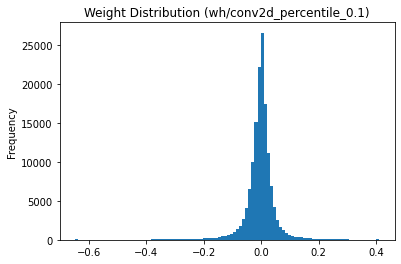

In [6]:
rmin = np.percentile(weight, 0.1, None)
print(rmin)
rmax = np.percentile(weight, 99.9, None)
print(rmax)

weight_1D = weight.flatten()
weight_1D[weight_1D > rmax] = rmax
weight_1D[weight_1D < rmin] = rmin

plt.clf()
plt.hist(weight_1D, bins=100)
plt.gca().set(title='Weight Distribution (wh/conv2d_percentile_0.1)', ylabel='Frequency')
plt.savefig('wh_conv2d_percentile_0.1.jpg')

-0.40372350811958313
1.3542829751968384


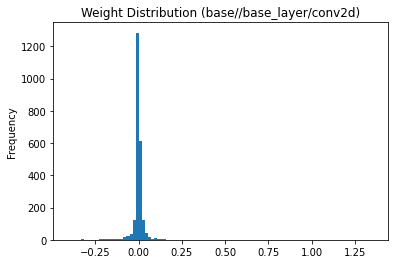

In [2]:
weight = data[()]['base/base_layer/conv2d/Conv2D']['weights']
weight_1D = weight.flatten()
rmin = np.percentile(weight, 0, None)
print(rmin)
rmax = np.percentile(weight, 100, None)
print(rmax)

plt.clf()
plt.hist(weight_1D, bins=100)
plt.gca().set(title='Weight Distribution (base//base_layer/conv2d)', ylabel='Frequency')
plt.savefig('base_base-layer_conv2d.jpg')

-0.1315839309990406
0.103329931274056


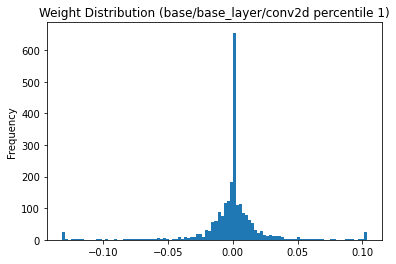

In [4]:
weight = data[()]['base/base_layer/conv2d/Conv2D']['weights']
weight_1D = weight.flatten()
rmin = np.percentile(weight, 1, None)
print(rmin)
rmax = np.percentile(weight, 99, None)
print(rmax)

weight_1D[weight_1D > rmax] = rmax
weight_1D[weight_1D < rmin] = rmin

plt.clf()
plt.hist(weight_1D, bins=100)
plt.gca().set(title='Weight Distribution (base/base_layer/conv2d percentile 1)', ylabel='Frequency')
plt.savefig('base_base-layer_conv2d_1.jpg')